# New Peruvian Food Restaurant in Toronto

## Introduction

**Peruvian food**, in recent years has been recognized internationally as **one of the best food in the world** (Ref: National Geographic [The world's best food destinations in 2019](https://www.nationalgeographic.co.uk/travel/2019/02/worlds-best-food-destinations-2019) ), so its demand has been **increasing** in the main capitals of the world.

## Problem Statement

Toronto is one of the cities with the greatest ethnic diversity in Canada, and therefore multicultural. That's why we want to **open a new Peruvian food restaurant** in this capital, so you want to know which are the districts with the highest and lowest saturation of this type of food. Knowing this, we can choose which is the best location for our new restaurant.

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup

Get Postal Codes of Canada

In [ ]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [ ]:
soup = BeautifulSoup(source, 'lxml')

Get only the table of Code Postal

In [ ]:
table = soup.find('table',{'class':'wikitable sortable'})

In [ ]:
table_rows = table.find_all('tr')

In [ ]:
table = []
for ifile in table_rows:
    row = []
    for t in ifile.find_all('td'):
        row =  row + [ t.text.strip() ]
    table.append(row)


table = pd.DataFrame(table, columns=['PostalCode', 'Borough', 'Neighbourhood'])
table.shape

Remove null date

In [ ]:
table = table[~table['PostalCode'].isnull()]
table.shape

In [ ]:
table.head(10)

Remove data in Borough column with value "Not Assigned"

In [ ]:
table = table[table['Borough']!="Not assigned"]
table.shape

Apply groupby functión and then aggregation in neighbourhood

In [ ]:
table = table.groupby(['PostalCode','Borough']).agg(lambda x: ','.join(x))
table.reset_index(inplace=True)
table.head(10)

Check Neighbourhood with value same to: "Not Assigned"

In [ ]:
table[table['Neighbourhood']=="Not assigned"]

In [ ]:
ListIndexNeigh_NotAssigned = table[table['Neighbourhood']=="Not assigned"].index.values.tolist()
ListIndexNeigh_NotAssigned

In [ ]:
for ind in ListIndexNeigh_NotAssigned:
    table.loc[ind]['Neighbourhood'] = table.loc[ind]['Borough']
    print("---")


In [ ]:
table.shape

In [ ]:
table[table['Neighbourhood']=="Not assigned"]

In [ ]:
table.head(10)

## Add Latitude and Longitude

Get latitude and longitude of cocl.us

In [ ]:
df_cp_coord = pd.read_csv('https://cocl.us/Geospatial_data')
df_cp_coord.head()

Rename Posta code Column

In [ ]:
df_cp_coord.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df_cp_coord.head()

In [ ]:
df = pd.merge(table, df_cp_coord, on='PostalCode')
df.head()

In [ ]:
df.shape

## Filtred borough with string Toronto

Import Nominatim Library

In [ ]:
from geopy.geocoders import Nominatim
import folium

Filter Borough with string Torongo

In [ ]:
df_toronto = df[df['Borough'].str.contains('Toronto')]
df_toronto.head(10)

In [ ]:
print('The dataframe of Toronto has {} boroughs and {} neighborhoods.'.format(
        len(df_toronto['Borough'].unique()),
        df_toronto.shape[0]
    )
)

Get one point media of toronto

In [ ]:
address = 'East Toronto, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
lat_toronto = location.latitude
lon_toronto = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(lat_toronto, lon_toronto))


### The maps of toronto with their neighbourhood

In [ ]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'YJOZR5RN2W24ACPOJ0VCMPQDL4OSWFH304PTJJDTLYZV1WSM' # your Foursquare ID
CLIENT_SECRET = 'HGFHMKWORFPPG42DYDH40Q3WG0RDGJNBGAA5RE2DDQPDCA0V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# LIMIT OF ITEMS
LIMIT = 100
# RADIUS 
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

We have define our function getNearbyVenues

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:

toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

In [ ]:
print(toronto_venues.shape)
toronto_venues.head(10)

Check the venues of toronto

In [ ]:
toronto_venues.groupby('Neighborhood').count()

### Check if exists peruvian restaurans in some neighborhood in toronto

In [ ]:
"Peruvian" in toronto_venues['Venue Category'].unique()

### Analyze Each Neighborhood

In [ ]:
del toronto_onehot
#toronto_onehot = None

In [236]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
#print('Neighborhood' in toronto_venues[['Venue Category']])
#print('Neighborhood' in toronto_onehot.columns )
#toronto_onehot['Neighborhood'].shape
print(toronto_onehot.shape)
toronto_onehot.head()


(1687, 236)


,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
"Neighborhood" in toronto_onehot.columns

True

In [230]:
toronto_onehot.columns.get_loc('Neighborhood')

163

In [239]:
NUMBEF = toronto_onehot.columns.get_loc('Neighborhood')-1
NUMAFT = toronto_onehot.columns.get_loc('Neighborhood')+1
fixed_columns = ['Neighborhood'] + list(toronto_onehot.columns[1:NUMBEF]) + list(toronto_onehot.columns[NUMAFT:-1])
print(len(fixed_columns))
print(fixed_columns)

233
['Neighborhood', 'Airport', 'Airport Food Court', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'American Restaurant', 'Antique Shop', 'Aquarium', 'Argentinian Restaurant', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auto Workshop', 'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Stadium', 'Basketball Stadium', 'Beach', 'Bed & Breakfast', 'Beer Bar', 'Beer Store', 'Belgian Restaurant', 'Bistro', 'Board Shop', 'Boat or Ferry', 'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint', 'Burrito Place', 'Bus Line', 'Butcher', 'Café', 'Cajun / Creole Restaurant', 'Camera Store', 'Candy Store', 'Caribbean Restaurant', 'Cheese Shop', 'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Climbing Gym', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'College Arts Building', 'College Gym', 'College Rec Center', 'Colombian Restaurant', 'Comfort Food Res

In [240]:
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']
print(toronto_onehot.shape)
toronto_onehot.head()

(1687, 236)


,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West,Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
toronto_onehot.shape

(1687, 233)

In [245]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped.head()

(38, 233)


,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,0.0
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.00,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.071429,0.071429,0.142857,0.142857,0.142857,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0


In [246]:
len(toronto_grouped[toronto_grouped["Mexican Restaurant"]>0])

6

In [ ]:
toronto_mexican = toronto_grouped[["Neighborhood","Mexican Restaurant"]]

In [220]:
print(toronto_mexican.shape)
toronto_mexican.head()

(38, 2)


,Neighborhood,Mexican Restaurant
0,"Adelaide,King,Richmond",0.0
1,Berczy Park,0.0
2,"Brockton,Exhibition Place,Parkdale Village",0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0


In [ ]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

mms = MinMaxScaler()
toronto_clustering = toronto_mexican.drop(["Neighborhood"], 1)
mms.fit(toronto_clustering)
data_transformed = mms.transform(toronto_clustering)

In [ ]:
Sum_of_squared_distances = []
Ksec = range(1,10)
for kind in Ksec:
    km = KMeans(n_clusters=kind).fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)


### Show the Best value of number of Cluster

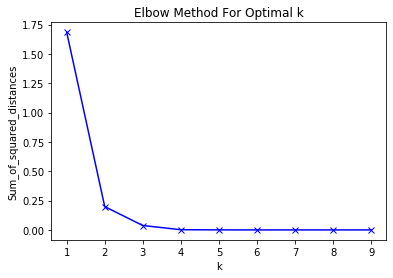

In [227]:

import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Clustering of Restaurant by Neighborhood

In [224]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=40).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_.shape)
kmeans.labels_[0:10] 

(38,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [251]:

#toronto_merged = toronto_mexican.copy()
toronto_merged = toronto_mexican.copy()

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_
toronto_merged.head()

,Neighborhood,Mexican Restaurant,Cluster Labels
0,"Adelaide,King,Richmond",0.0,0
1,Berczy Park,0.0,0
2,"Brockton,Exhibition Place,Parkdale Village",0.0,0
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0


In [253]:
df_toronto.rename(columns={"Neighbourhood": "Neighborhood"}, inplace=True)
df_toronto.head()

/home/ibmmagrados/anaconda3/envs/my_env/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [254]:

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df_toronto.set_index('Neighborhood'), on='Neighborhood')
print(toronto_merged.shape)
toronto_merged


(38, 7)


,Neighborhood,Mexican Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide,King,Richmond",0.000000,0,M5H,Downtown Toronto,43.650571,-79.384568
1,Berczy Park,0.000000,0,M5E,Downtown Toronto,43.644771,-79.373306
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0,M6K,West Toronto,43.636847,-79.428191
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0,M7Y,East Toronto,43.662744,-79.321558
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0,M5V,Downtown Toronto,43.628947,-79.394420
5,"Cabbagetown,St. James Town",0.000000,0,M4X,Downtown Toronto,43.667967,-79.367675
6,Central Bay Street,0.000000,0,M5G,Downtown Toronto,43.657952,-79.387383
7,"Chinatown,Grange Park,Kensington Market",0.041667,0,M5T,Downtown Toronto,43.653206,-79.400049
8,Christie,0.000000,0,M6G,Downtown Toronto,43.669542,-79.422564
9,Church and Wellesley,0.012048,0,M4Y,Downtown Toronto,43.665860,-79.383160


## Visualization of Cluster of Mexican restaurant

In [255]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [256]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters